Monthly deaths

H0: Every month deaths are increasing
H1: Every month deaths are not increasing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data loading
import pandas as pd
import statsmodels
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import numpy as np
from plotnine import *
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
EDA_file = pd.read_csv("/content/drive/MyDrive/Springboard/outputfilename.csv")
EDA_file = EDA_file.drop(columns=['state_fips_code', 'res_county','county_fips_code','ethnicity','case_positive_specimen_interval','case_onset_interval'])

#EDA_file.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
EDA_file=EDA_file.loc[(EDA_file['death_yn'].isin(['Yes','No'])) & (EDA_file['age_group'].isin(['18 to 49 years','50 to 64 years','65+ years','0 - 17 years'])) & EDA_file['sex'].isin(['Female','Male']) & 
                                  EDA_file['race'].isin(['White','Black','Asian','American Indian/Alaska Native','Native Hawaiian/Other Pacific Islander','Multiple/Other','Unknown'])
                                  & (~EDA_file['process'].isin(['Other'])) & (~EDA_file['underlying_conditions_yn'].isnull())]
EDA_file.head()

,case_month,res_state,age_group,sex,race,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
35,2020-09,NC,18 to 49 years,Female,Black,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
140,2020-07,KS,18 to 49 years,Male,White,Laboratory reported,Missing,Laboratory-confirmed case,Symptomatic,Unknown,No,No,Yes
202,2020-08,NC,50 to 64 years,Female,Black,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
231,2020-08,IA,18 to 49 years,Male,White,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
327,2020-12,NC,0 - 17 years,Female,White,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes


In [ ]:
df = EDA_file.groupby(['case_month','res_state','sex','race','process','exposure_yn','symptom_status','hosp_yn','current_status','age_group','underlying_conditions_yn','icu_yn'])['death_yn'].agg(['count']).reset_index()

df.head()

,case_month,res_state,sex,race,process,exposure_yn,symptom_status,hosp_yn,current_status,age_group,underlying_conditions_yn,icu_yn,count
0,2020-01,NJ,Female,White,Missing,Missing,Missing,Yes,Laboratory-confirmed case,18 to 49 years,Yes,Missing,3
1,2020-01,NJ,Female,White,Missing,Missing,Unknown,Yes,Laboratory-confirmed case,18 to 49 years,Yes,Unknown,3
2,2020-01,NJ,Male,White,Missing,Missing,Symptomatic,Yes,Laboratory-confirmed case,65+ years,Yes,Unknown,1
3,2020-01,NJ,Male,White,Missing,Missing,Unknown,Yes,Laboratory-confirmed case,65+ years,Yes,Unknown,2
4,2020-02,NY,Male,Unknown,Missing,Missing,Symptomatic,Yes,Laboratory-confirmed case,50 to 64 years,Yes,No,1


In [ ]:
month_df = df.groupby(['case_month']).sum('count').reset_index()
month_df = month_df.sort_values(by = month_df.columns[1])

month_df.head()

,case_month,count
0,2020-01,9
1,2020-02,29
19,2021-08,88
17,2021-06,4841
16,2021-05,16741


In [ ]:
#month_df['case_month'].dtype
#month_df['case_month']=pd.to_datetime(month_df['case_month'])
#month_df.set_index('case_month', inplace=True)

#month_df['case_month'].dtype
#series = month_df.loc[:, 'case_month'].values
#series
X = month_df['count']


 

In [ ]:
#ADF test

result = adfuller(X)

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 6.228432767146877
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -4.137829282407408
Critial Values:
   5%, -3.1549724074074077
Critial Values:
   10%, -2.7144769444444443




Age group 

H0: Maximum deaths happened are in 18-49 years age group people
H1:Maximum deaths are not in 18-49 years age group people

Symptoms

H0:Deaths are more in people with Symptoms
H1:Deaths are not more in people with Symptoms

Underlying conditions

H0:deaths are more in people with underlying conditions
H1:deaths are more in people without underlying conditions

Race

H0:Total deaths are more in white race than other races
H1:Total deaths are not more in white race than other races


In [ ]:
#Gender
#H0: Female deaths are twice as male deaths in 2020 and 2021 
#H1:Female deaths are not as twice as male deaths
 

#gender_month_df = df.groupby(['case_month','res_state','sex']).sum('count').reset_index()
gender_month_df = df[['res_state','sex','count']]
#gender_month_df= gender_month_df.sort_values(by=['case_month'])
gender_month_df.head()

,res_state,sex,count
0,NJ,Female,3
1,NJ,Female,3
2,NJ,Male,1
3,NJ,Male,2
4,NY,Male,1


In [ ]:
male = gender_month_df[gender_month_df["sex"]=='Male']['count']
female = gender_month_df[gender_month_df["sex"]=='Female']['count']


male

female

0         3
1         3
6         2
7         4
8         1
         ..
102465    1
102466    1
102470    1
102473    1
102474    2
Name: count, Length: 55264, dtype: int64

In [ ]:
t_value,p_value=stats.ttest_ind(male,female)

one_tailed_p_value=float("{:.6f}".format(p_value/2))

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

    effect of male and female death counts are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the students have not benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)


Test statistic is -3.546468
p-value for two tailed test is 0.000391
p-value for one_tailed_test is 0.000195
Conclusion n Since p-value(=0.000391) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the 

    effect of male and female death counts are not equal i.e., μ1 = μ2 at 0.05 level of significance.


1. Check assumptions and write hypotheses
In order to use Pearson's  both variables must be quantitative and the relationship between  and  must be linear

Research Question	Is the correlation in the population different from 0?	Is the correlation in the population positive?	Is the correlation in the population negative?
Null Hypothesis, 			
Alternative Hypothesis, 			
Type of Hypothesis Test	Two-tailed, non-directional	Right-tailed, directional	Left-tailed, directional
2. Calculate the test statistic
Use Minitab to compute 

3. Determine the p-value
Minitab will give you the p-value for a two-tailed test (i.e., ). If you are conducting a one-tailed test you will need to divide the p-value in the output by 2.

4. Make a decision
If  reject the null hypothesis, there is evidence of a relationship in the population.

If  fail to reject the null hypothesis, there is not evidence of a relationship in the population.

5. State a "real world" conclusion.
Based on your decision in Step 4, write a conclusion in terms of the original research question.

**H0: Maximum deaths happened are in 18-49 years age group people H1:Maximum deaths are not in 18-49 years age group people**

**AGE** **GROUP**

In [ ]:
#Age group 

#H0: Maximum deaths happened are in 18-49 years age group people
#H1:Maximum deaths are not in 18-49 years age group people
#ANOVA testing

age_df = df[['case_month','res_state','age_group','count']]

age_melt = pd.melt(age_df, id_vars =['res_state'], value_vars =['age_group'])

#age_df.age_group
age_df


,case_month,res_state,age_group,count
0,2020-01,NJ,18 to 49 years,3
1,2020-01,NJ,18 to 49 years,3
2,2020-01,NJ,65+ years,1
3,2020-01,NJ,65+ years,2
4,2020-02,NY,50 to 64 years,1
...,...,...,...,...
102470,2021-08,UT,18 to 49 years,1
102471,2021-08,UT,18 to 49 years,1
102472,2021-08,UT,18 to 49 years,1
102473,2021-08,VA,18 to 49 years,1


In [ ]:
#age_df = age_df.set_index('age_group').T

#age_df

In [ ]:
a_df = df.groupby(['age_group','case_month']).sum('count').reset_index()


#a_df = a_df.set_index('age_group').T
#a_df

agegroup1_df = a_df.loc[(a_df['age_group'].isin(['0 - 17 years'])),
                    ['case_month','age_group','count']].head(16)
agegroup2_df = a_df.loc[(a_df['age_group'].isin(['18 to 49 years'])),
                    ['case_month','age_group','count']].head(16)
agegroup3_df = a_df.loc[(a_df['age_group'].isin(['50 to 64 years'])),
                    ['case_month','age_group','count']].head(16)
agegroup4_df = a_df.loc[(a_df['age_group'].isin(['65+ years'])),
                    ['case_month','age_group','count']].head(16)
#b_df = age_df.loc[(age_df['case_month'].isin(['2020-11','2020-12','2020-10'])) & (age_df['age_group'].isin(['18 to 49 years'])) & (age_df['res_state'].isin(['NY','FL','OH'])),
#                    ['count']].head()
#c_df = age_df.loc[(age_df['case_month'].isin(['2020-11','2020-12','2020-10'])) & (age_df['age_group'].isin(['50 to 64 years'])) & (age_df['res_state'].isin(['NY','FL','OH'])),
#                    ['count']].head()
#d_df = age_df.loc[(age_df['case_month'].isin(['2020-11','2020-12','2020-10'])) & (age_df['age_group'].isin(['65+ years'])) & (age_df['res_state'].isin(['NY','FL','OH'])),
#                    ['count']].head()
#a_df

In [ ]:
[agegroup1_df['count']]

[0      134
 1      605
 2      973
 3     2333
 4     2804
 5     1863
 6     2658
 7     4829
 8     8649
 9     8424
 10    7900
 11    2890
 12    2818
 13    4217
 14    1961
 15     279
 Name: count, dtype: int64]

In [ ]:
#len(agegroup2_df)

In [ ]:
#len(agegroup3_df)

In [ ]:
#len(agegroup4_df)

In [ ]:
#a_df['count']

In [ ]:
#Explanatory variable is categorical and response variable is Quantitative variable
#ANOVA

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(agegroup1_df['count'],agegroup2_df['count'],agegroup3_df['count'],agegroup4_df['count'])
print(fvalue, pvalue)

12.228850305901386 2.4018837164440905e-06


In [ ]:
mc1 = MultiComparison(a_df['count'], a_df['age_group'])
mc1_results = mc1.tukeyhsd()
print(mc1_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1         group2       meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------------
  0 - 17 years 18 to 49 years  20823.6625  0.001  10302.6951   31344.63   True
  0 - 17 years 50 to 64 years   8887.3994 0.1269  -1633.5681 19408.3668  False
  0 - 17 years      65+ years   9080.6625 0.1148  -1440.3049   19601.63  False
18 to 49 years 50 to 64 years -11936.2632 0.0156 -22160.8057 -1711.7206   True
18 to 49 years      65+ years    -11743.0  0.018 -21967.5425 -1518.4575   True
50 to 64 years      65+ years    193.2632    0.9 -10031.2794 10417.8057  False
------------------------------------------------------------------------------


In [ ]:

a_df

,age_group,case_month,count
0,0 - 17 years,2020-03,134
1,0 - 17 years,2020-04,605
2,0 - 17 years,2020-05,973
3,0 - 17 years,2020-06,2333
4,0 - 17 years,2020-07,2804
...,...,...,...
69,65+ years,2021-03,5270
70,65+ years,2021-04,4077
71,65+ years,2021-05,1698
72,65+ years,2021-06,394


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


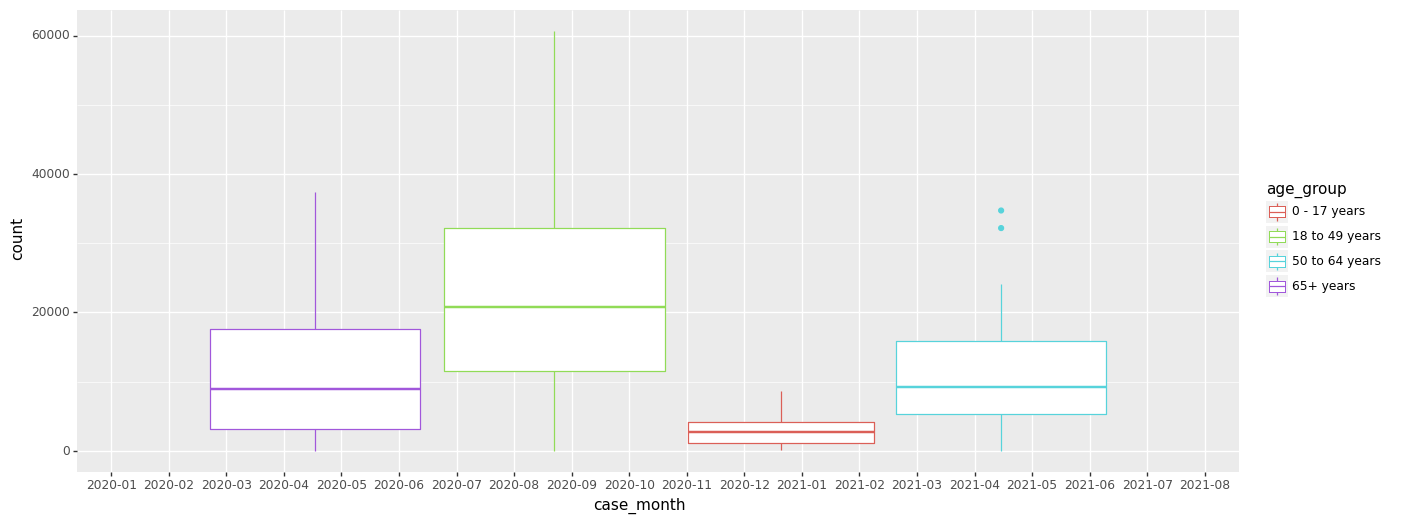

<ggplot: (8750627773653)>

In [ ]:
ggplot(a_df, aes(x='case_month',y='count',color='age_group',group = 'age_group')) + geom_boxplot() + theme(
    figure_size=(15, 6))

**GENDER** **DATA** 

In [ ]:
g_df = df.groupby(['sex','case_month']).sum('count').reset_index()
#g_df

In [ ]:
male_df = g_df.loc[(g_df['sex'].isin(['Male'])),
                    ['case_month','sex','count']]
#male_df

In [ ]:
female_df = g_df.loc[(g_df['sex'].isin(['Female'])),
                    ['case_month','sex','count']]
#female_df

In [ ]:
#Explanatory variable is categorical and response variable is Quantitative variable
#ANOVA

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(male_df['count'],female_df['count'])
print(fvalue, pvalue)

1.0608765644846043 0.30952685990352197


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


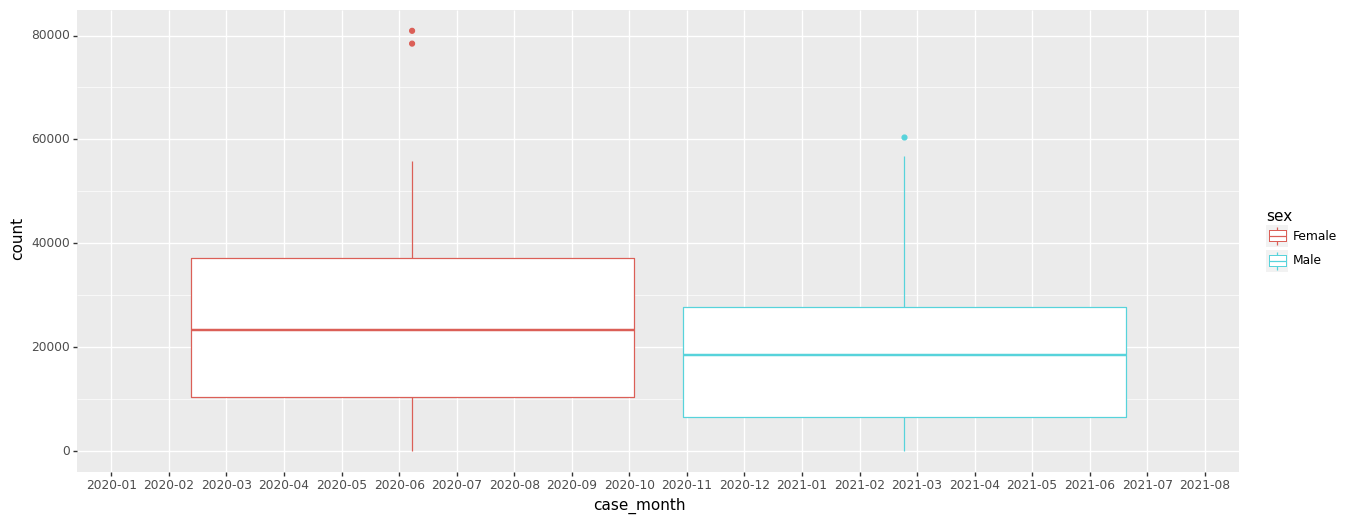

<ggplot: (8750627910037)>

In [ ]:
ggplot(g_df, aes(x='case_month',y='count',color='sex',group = 'sex')) + geom_boxplot() + theme(
    figure_size=(15, 6))

**H0:Deaths are more in people with Symptoms H1:Deaths are not more in people with Symptoms**

In [ ]:
s_df = df.groupby(['symptom_status','case_month']).sum('count').reset_index()
s_df

,symptom_status,case_month,count
0,Asymptomatic,2020-03,59
1,Asymptomatic,2020-04,1386
2,Asymptomatic,2020-05,2636
3,Asymptomatic,2020-06,2439
4,Asymptomatic,2020-07,4207
...,...,...,...
71,Unknown,2021-04,341
72,Unknown,2021-05,189
73,Unknown,2021-06,92
74,Unknown,2021-07,278


In [ ]:
s1_df = s_df.loc[(s_df['symptom_status'].isin(['Asymptomatic'])),
                    ['case_month','symptom_status','count']]
s2_df = s_df.loc[(s_df['symptom_status'].isin(['Symptomatic'])),
                    ['case_month','symptom_status','count']]


In [ ]:
#s1_df

In [ ]:
#s2_df

In [ ]:
#Explanatory variable is categorical and response variable is Quantitative variable
#ANOVA

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(s1_df['count'],s2_df['count'])
print(fvalue, pvalue)

21.077195386761918 5.205147770842483e-05


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


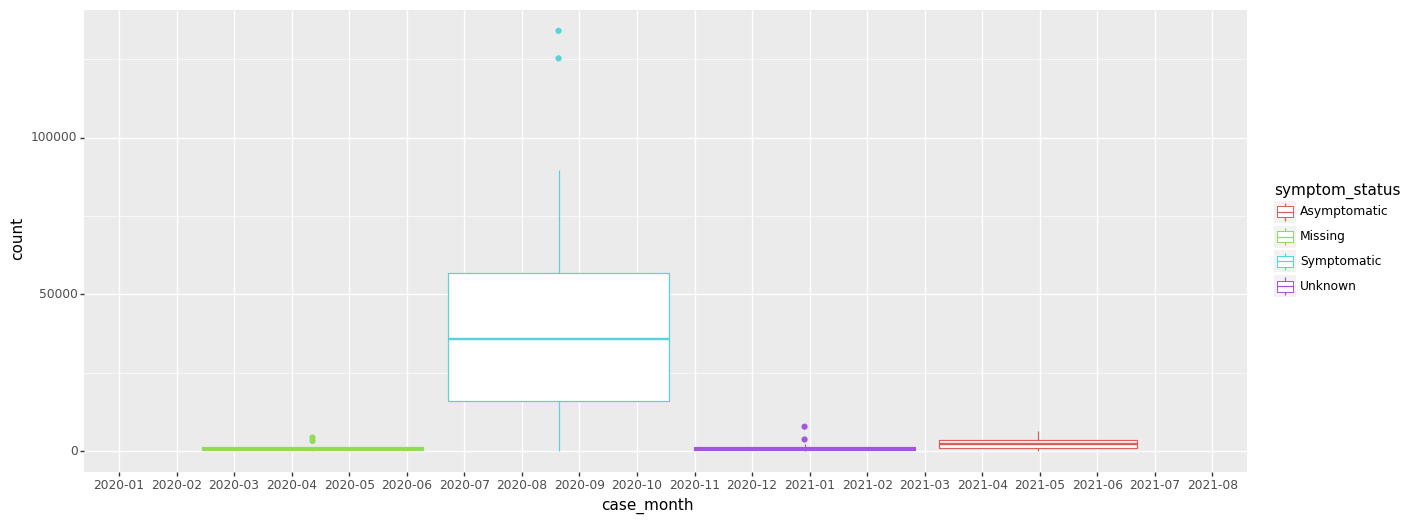

<ggplot: (8750628027637)>

In [ ]:
ggplot(s_df, aes(x='case_month',y='count',color='symptom_status',group = 'symptom_status')) + geom_boxplot() + theme(
    figure_size=(15, 6))

**H0:Total deaths are more in white race than other races H1:Total deaths are not more in white race than other races**

In [ ]:
r_df = df.groupby(['race','case_month']).sum('count').reset_index()
r_df

,race,case_month,count
0,American Indian/Alaska Native,2020-03,2
1,American Indian/Alaska Native,2020-04,33
2,American Indian/Alaska Native,2020-05,116
3,American Indian/Alaska Native,2020-06,81
4,American Indian/Alaska Native,2020-07,234
...,...,...,...
122,White,2021-04,26986
123,White,2021-05,12397
124,White,2021-06,3555
125,White,2021-07,12408


In [ ]:
race1_df = r_df.loc[(r_df['race'].isin(['American Indian/Alaska Native'])),
                    ['case_month','race','count']]
race2_df = r_df.loc[(r_df['race'].isin(['White'])),
                    ['case_month','race','count']]
race3_df = r_df.loc[(r_df['race'].isin(['Asian'])),
                    ['case_month','race','count']]
race4_df = r_df.loc[(r_df['race'].isin(['Native Hawaiian/Other Pacific Islander'])),
                    ['case_month','race','count']]
race5_df = r_df.loc[(r_df['race'].isin(['Black'])),
                    ['case_month','race','count']]
                    	

In [ ]:
#Explanatory variable is categorical and response variable is Quantitative variable
#ANOVA
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(race1_df['count'],race2_df['count'])
print(fvalue, pvalue)

20.10089891820356 7.553376038930599e-05


In [ ]:
fvalue, pvalue = stats.f_oneway(race3_df['count'],race4_df['count'])
print(fvalue, pvalue)

16.45854251688132 0.00028618045107744534


In [ ]:
fvalue, pvalue = stats.f_oneway(race1_df['count'],race2_df['count'],race3_df['count'],race4_df['count'],race5_df['count'])
print(fvalue, pvalue)

18.593699513564818 5.2026844833219814e-11


In [ ]:
#post hoc test
mc2 = MultiComparison(r_df['count'], r_df['race'])
mc2_results = mc2.tukeyhsd()
print(mc2_results)

                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
                group1                                 group2                  meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------------------------------------------------------------
         American Indian/Alaska Native                                  Asian   812.3627    0.9 -12524.3758 14149.1013  False
         American Indian/Alaska Native                                  Black  7454.0294 0.6153  -5882.7091 20790.7679  False
         American Indian/Alaska Native                         Multiple/Other  2236.9183    0.9 -11099.8202 15573.6568  False
         American Indian/Alaska Native Native Hawaiian/Other Pacific Islander    13.1765    0.9 -13512.7451  13539.098  False
         American Indian/Alaska Native                                Unknown  2784.1084    0.9 -10381.0569 15949.2737

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


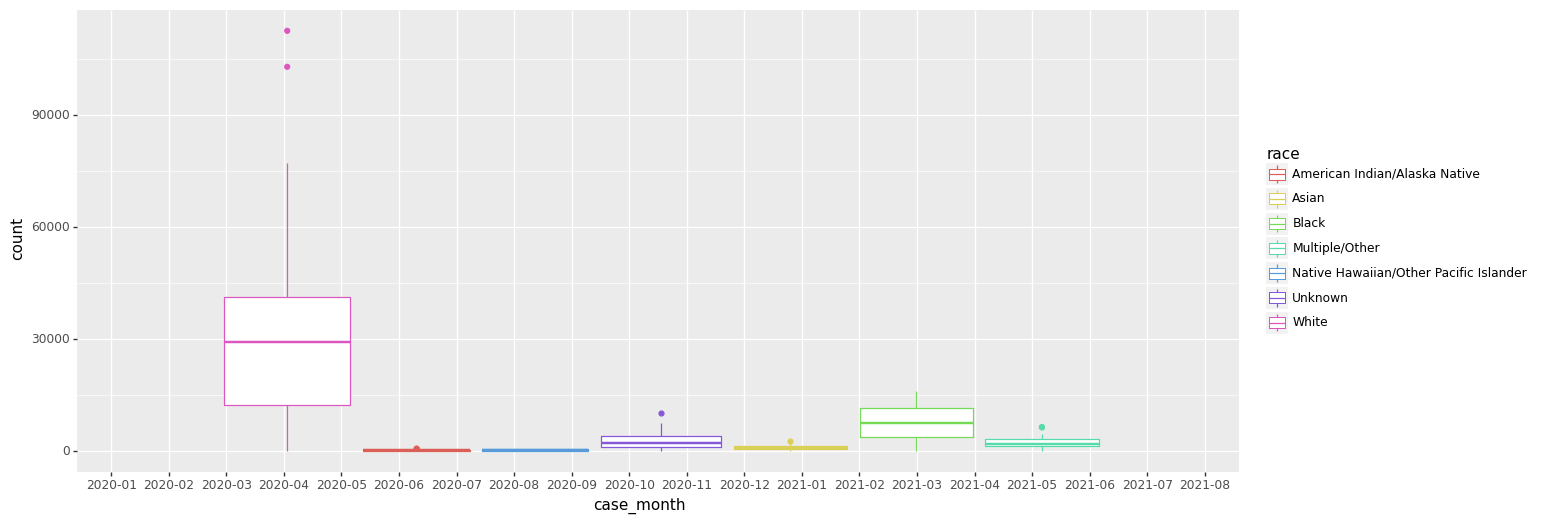

<ggplot: (8750628140725)>

In [ ]:
ggplot(r_df, aes(x='case_month',y='count',color='race',group = 'race')) + geom_boxplot() + theme(
    figure_size=(15, 6))

**H0:deaths are more in people with underlying conditions H1:deaths are more in people without underlying conditions**

In [ ]:
c_df = df.groupby(['underlying_conditions_yn','case_month']).sum('count').reset_index()
c_df

,underlying_conditions_yn,case_month,count
0,No,2020-03,2
1,No,2020-04,27
2,No,2020-05,812
3,No,2020-06,2317
4,No,2020-07,2979
5,No,2020-08,2061
6,No,2020-09,2191
7,No,2020-10,3760
8,No,2020-11,3913
9,No,2020-12,418


In [ ]:
c1_df = c_df.loc[(c_df['underlying_conditions_yn'].isin(['Yes'])),
                    ['case_month','underlying_conditions_yn','count']]
c2_df = c_df.loc[(c_df['underlying_conditions_yn'].isin(['No'])),
                    ['case_month','underlying_conditions_yn','count']]

In [ ]:
fvalue, pvalue = stats.f_oneway(c1_df['count'],c2_df['count'])
print(fvalue, pvalue)

22.585207238236272 3.193951128253401e-05


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


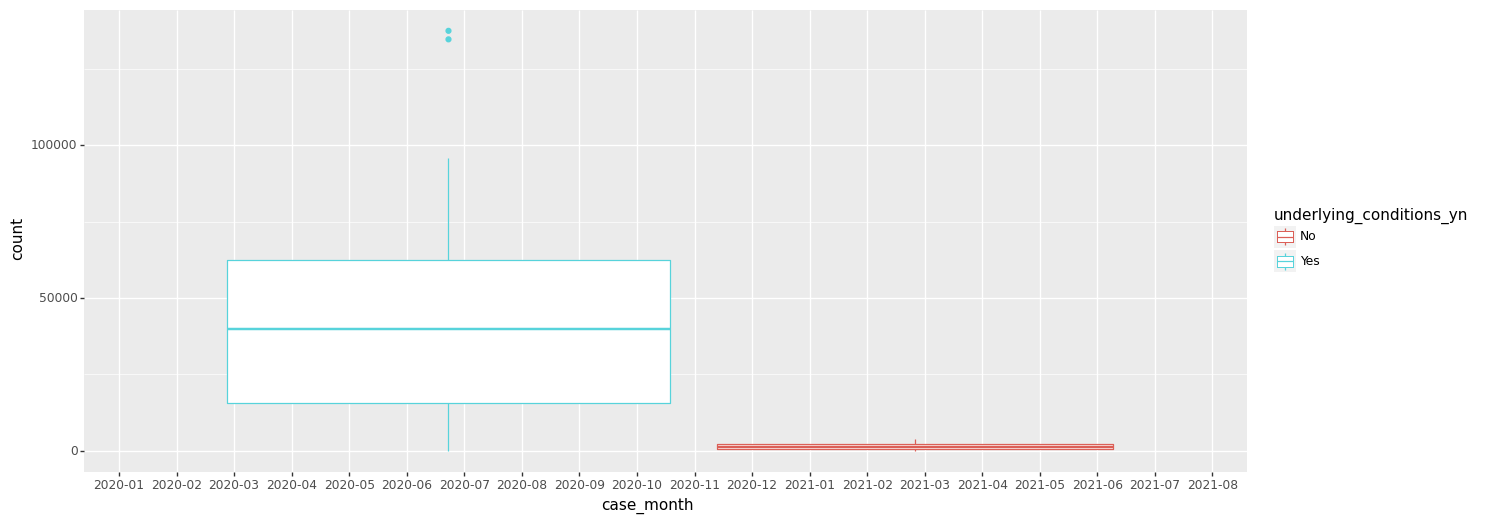

<ggplot: (8750628170449)>

In [ ]:
ggplot(c_df, aes(x='case_month',y='count',color='underlying_conditions_yn',group = 'underlying_conditions_yn')) + geom_boxplot() + theme(
    figure_size=(15, 6))